# PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10, size=100)

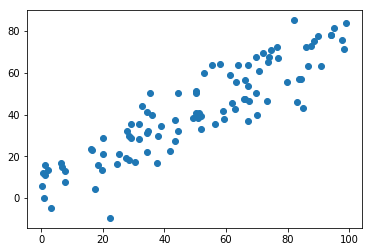

In [3]:
plt.scatter(X[:, 0], X[:, 1])

### 1. Demean 
   **均值归零，所有样本减去均值**

In [4]:
def demean(X):
    # 在行方向求均值，得到每一列的均值
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

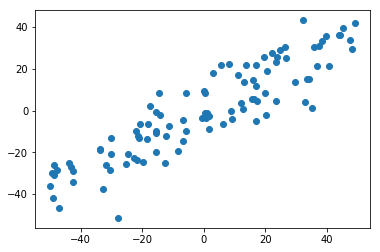

In [6]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])

In [7]:
np.mean(X_demean, axis=0)

array([1.22923893e-14, 9.87654403e-15])

### 2. 梯度上升法

In [8]:
# 效用函数
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [9]:
# 数学方法求梯度
def dF_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [10]:
# debug方式求梯度
def dF_debug(w, X, epsilon=0.0001):
    # debug 
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
        
    return res

In [12]:
# 把 w 单位化
def direction(w):
    return w / np.linalg.norm(w)
# 梯度上升法
def gradient_ascent(dF, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    cur_iter = 0
    w = direction(initial_w)
    
    while cur_iter < n_iters:
        gradient = dF(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)  # 注意 1：每次求一个单位方向
        if abs(f(w, X) - f(last_w, X)) < epsilon:
            break
        
        cur_iter += 1
    
    return w

In [13]:
initial_w = np.random.random(X.shape[1]) # 注意 2：不能用0向量开始

In [14]:
initial_w

array([0.87200834, 0.26021736])

In [15]:
eta = 0.01

##### 注意 3：不能使用 StandardScaler标准化向量##### 

In [18]:
gradient_ascent(dF_debug, X_demean, initial_w, eta)

array([0.7870297 , 0.61691511])

In [17]:
gradient_ascent(dF_math, X_demean, initial_w, eta)

array([0.7870297 , 0.61691511])

##### 绘制图形

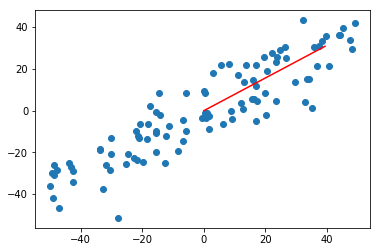

In [21]:
w = gradient_ascent(dF_math, X_demean, initial_w, eta)
plt.scatter(X_demean[:, 0], X_demean[:, 1])
# 先绘制 [0, 0]点， 再绘制 单位向量 终点
plt.plot([0, w[0]*50], [0, w[1]*50], color='r')